In [1]:
import sys
sys.path.append('../..')

from nn import Model
from nn.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from nn.regularizers import L1, L2, L1L2
from nn.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_train = X_train / 255

X_test = X_test.reshape((X_test.shape[0], -1))
X_test = X_test / 255

p = np.random.permutation(X_train.shape[0])
X_train = np.take(X_train,p,axis=0)
y_train = np.take(y_train,p,axis=0)


In [3]:
no_reg = Model()
no_reg.add(Dense(20, activation='sigmoid', input_shape=(784,)))
no_reg.add(Dense(10, activation='softmax'))
no_reg.compile(optimizer=Adam())
no_reg.fit(X_train, y_train, epochs=30, batch_size=32, validation_fraction=0.2)

In [4]:
_, train_scores = no_reg.evaluate(X_train, y_train)
_, test_scores = no_reg.evaluate(X_test, y_test)
print('Train/Test accuracy: %0.3f/%0.3f' % (train_scores['acc'], test_scores['acc']))

Train/Test accuracy: 0.956/0.937


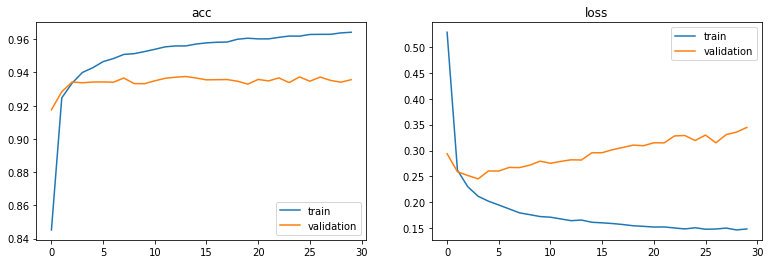

In [5]:
figure, subplots = plt.subplots(1, 2)
figure.set_size_inches(13, 4)

for subplot, metric in zip(subplots, ['acc', 'loss']):
    subplot.plot(no_reg.scores[metric])
    subplot.plot(no_reg.scores['val_' + metric])
    subplot.set_title(metric)
    subplot.legend(['train', 'validation'])

plt.show()

In [6]:
l1 = Model()
l1.add(Dense(20, activation='sigmoid', input_shape=(784,), regularizer=L1(l=0.005)))
l1.add(Dense(10, activation='softmax', regularizer=L1(l=0.005)))
l1.compile(optimizer=Adam())
l1.fit(X_train, y_train, epochs=30, batch_size=32, validation_fraction=0.2)

In [7]:
_, train_scores = l1.evaluate(X_train, y_train)
_, test_scores = l1.evaluate(X_test, y_test)
print('Train/Test accuracy: %0.3f/%0.3f' % (train_scores['acc'], test_scores['acc']))

Train/Test accuracy: 0.943/0.944


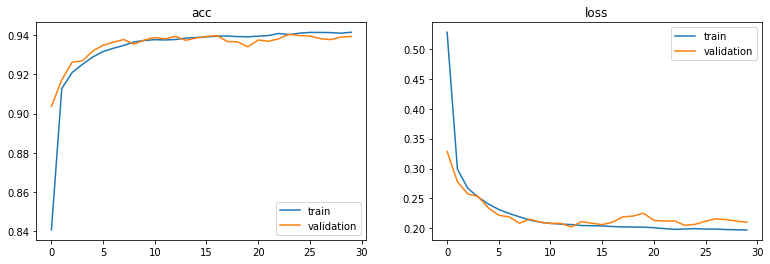

In [8]:
figure, subplots = plt.subplots(1, 2)
figure.set_size_inches(13, 4)

for subplot, metric in zip(subplots, ['acc', 'loss']):
    subplot.plot(l1.scores[metric])
    subplot.plot(l1.scores['val_' + metric])
    subplot.set_title(metric)
    subplot.legend(['train', 'validation'])

plt.show()

In [9]:
l2 = Model()
l2.add(Dense(20, activation='sigmoid', input_shape=(784,), regularizer=L2(l=0.01)))
l2.add(Dense(10, activation='softmax', regularizer=L2(l=0.01)))
l2.compile(optimizer=Adam())
l2.fit(X_train, y_train, epochs=30, batch_size=32, validation_fraction=0.2)

In [10]:
_, train_scores = l2.evaluate(X_train, y_train)
_, test_scores = l2.evaluate(X_test, y_test)
print('Train/Test accuracy: %0.3f/%0.3f' % (train_scores['acc'], test_scores['acc']))

Train/Test accuracy: 0.943/0.941


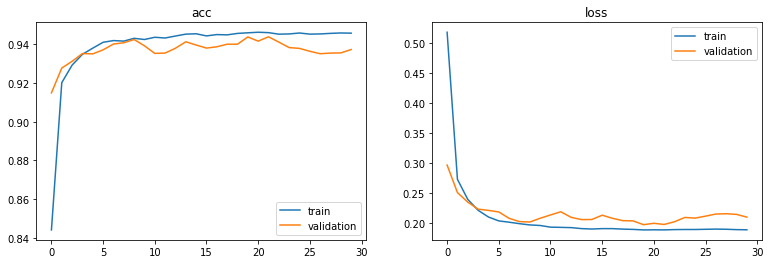

In [11]:
figure, subplots = plt.subplots(1, 2)
figure.set_size_inches(13, 4)

for subplot, metric in zip(subplots, ['acc', 'loss']):
    subplot.plot(l2.scores[metric])
    subplot.plot(l2.scores['val_' + metric])
    subplot.set_title(metric)
    subplot.legend(['train', 'validation'])

plt.show()

In [12]:
l1_l2 = Model()
l1_l2.add(Dense(20, activation='sigmoid', input_shape=(784,), regularizer=L1L2(l1=0.005, l2=0.01)))
l1_l2.add(Dense(10, activation='softmax', regularizer=L1L2(l1=0.005, l2=0.01)))
l1_l2.compile(optimizer=Adam())
l1_l2.fit(X_train, y_train, epochs=30, batch_size=32, validation_fraction=0.2)

In [13]:
_, train_scores = l1_l2.evaluate(X_train, y_train)
_, test_scores = l1_l2.evaluate(X_test, y_test)
print('Train/Test accuracy: %0.3f/%0.3f' % (train_scores['acc'], test_scores['acc']))

Train/Test accuracy: 0.938/0.939


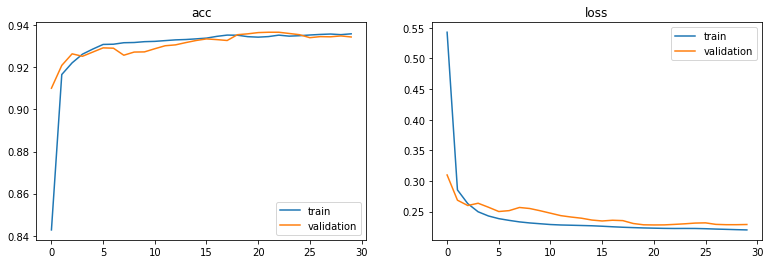

In [14]:
figure, subplots = plt.subplots(1, 2)
figure.set_size_inches(13, 4)

for subplot, metric in zip(subplots, ['acc', 'loss']):
    subplot.plot(l1_l2.scores[metric])
    subplot.plot(l1_l2.scores['val_' + metric])
    subplot.set_title(metric)
    subplot.legend(['train', 'validation'])

plt.show()